# Dataset Loading from previous stage

### Constants

In [15]:
data_read_path = '/content/drive/MyDrive/CombinedData.csv'
data_clean_path='/content/drive/MyDrive/CombinedDataCleaned.csv'
data_nlped_path='/content/drive/MyDrive/CombinedDataNLPed.csv'


## Import Libraries
---
lets start by importing the nessacary libraries

#### insatll stanza

In [16]:
pip install contractions

In [17]:
pip install stanza

### import

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import emoji
import contractions
import pandas as pd
import gensim
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif ,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from transformers import BertTokenizer, TFBertModel

#from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive
from textblob import TextBlob


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import stanza
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [19]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


### Download packages

In [20]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

## Loading the dataset

In [21]:
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
df = pd.read_csv(data_nlped_path)

In [23]:
df.fillna("", inplace=True)

In [24]:
df.head(3)

,statement,status,statemnent_length,num_of_words,num_of_sentences,statement_with_emojis,tokens,tokens_stemmed,tokens_verbs,tokens_nouns,tokens_adj,important_words,sentiment_scores,avg_sentiment,max_sentiment,min_sentiment,mean_vector,bos,bos_lesk
0,oh my gosh,Anxiety,10,3,1,oh my gosh,"['oh', 'my', 'gosh']",oh my gosh,,gosh,,gosh my oh,"[0, 0, 0.0, -0.05, 0, 0, 0, 0, 0.0, 0.0, 0, 0,...",-0.005000,0.000,-0.0500,[-0.23138428 0.14325714 0.03421021 0.102539...,ohio.n.01,ohio.n.01 gosh
1,trouble sleeping confused mind restless heart ...,Anxiety,64,10,2,trouble sleeping confused mind restless heart ...,"['trouble', 'sleeping', 'confused', 'mind', 'r...",troubl sleep confus mind restless heart all ou...,sleeping confused,trouble mind heart tune,restless,out mind all tune sleeping confused restless h...,"[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.075, 0,...",0.003552,0.075,-0.0625,[-1.76584467e-01 1.32867426e-01 -9.40185506e-...,trouble.n.01 sleeping.n.01 confuse.v.01 mind.n...,worry.n.02 sleeping.n.03 broken.s.08 thinker.n...
2,all wrong back off dear forward doubt stay in ...,Anxiety,78,14,2,all wrong back off dear forward doubt stay in ...,"['all', 'wrong', 'back', 'off', 'dear', 'forwa...",all wrong back off dear forward doubt stay in ...,,dear doubt stay restless place,wrong restless,wrong all place stay doubt dear a restless off...,"[0, 0, -0.017857142857142856, 0.0, 0.0, 0, 0, ...",0.001014,0.075,-0.0625,[-0.18049338 0.1342536 -0.00547056 0.131415...,all.a.01 wrong.n.01 back.n.01 murder.v.01 belo...,wrong.n.02 binding.n.05 lamb.n.04 forward.n.02...


In [25]:
df.shape

(52681, 19)

# ***Embedding***

### Fastext

In [12]:
!pip install fasttext gensim


In [63]:
from gensim.downloader import load

# Load a pre-trained FastText model (e.g., Wiki News)
print("Loading the pre-trained FastText model...")
#fasttext_model = load('fasttext-wiki-news-subwords-300')  # This may take some time
fasttext_model  = KeyedVectors.load('/content/drive/My Drive/fasttext-wiki-news-subwords-300')

print("FastText model loaded successfully!")
from gensim.models import KeyedVectors





Loading the pre-trained FastText model...
[==================================================] 100.0% 958.5/958.4MB downloaded
FastText model loaded successfully!


In [65]:
# Define the path to save the model in your Google Drive
save_path = '/content/drive/My Drive/fasttext-wiki-news-subwords-300'

# Ensure the directory exists
import os
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the FastText model file to Google Drive
print("Saving the FastText model to Google Drive...")
fasttext_model.save_word2vec_format(save_path, binary=False)
print(f"FastText model saved successfully at {save_path}!")


Saving the FastText model to Google Drive...
FastText model saved successfully at /content/drive/My Drive/fasttext-wiki-news-subwords-300!


In [67]:
# @title Mapping statement to vector

from nltk.tokenize import sent_tokenize

# Function to compute the mean of sentence embeddings
def compute_mean_sentence_vector(text, model, vector_size=300):
    """
    Computes the mean sentence embeddings for the entire text.
    """
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Compute the sentence vectors
    sentence_vectors = [model.get_sentence_vector(sentence) for sentence in sentences]

    # Compute the mean of the sentence vectors or return a zero vector if no sentence embeddings
    if sentence_vectors:
        return np.mean(sentence_vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Apply the function to compute statement-level embeddings
vector_size = fasttext_model.vector_size  # Size of the Word2Vec vectors
df['mean_vector'] = df['statement'].apply(lambda x: compute_mean_word2vec(x, fasttext_model, vector_size))

# Check the result
print(df['mean_vector'].head())



0    [-0.061966892, -0.07592073, -0.018670999, 0.01...
1    [0.00834443, -0.005001361, 0.006062356, 0.0212...
2    [0.0036149013, -0.00086078636, 0.0011873286, 0...
3    [-0.017901476, 0.033412736, 0.009791955, -0.00...
4    [-0.02094844, 0.019103264, 0.012436507, 0.0093...
Name: mean_vector, dtype: object


### Word2vec

In [12]:
# @title Loading Word2vVec Model
# Download the pre-trained Word2Vec model (Google's Word2Vec model)\n",
import gensim.downloader as api
from gensim.models import KeyedVectors

print("Downloading the pre-trained Word2Vec model...")
# word2vec_model = api.load("word2vec-google-news-300")  # This may take some time
word2vec_model  = KeyedVectors.load('/content/drive/My Drive/word2vec-google-news-300.bin')

print("Model loaded successfully!")


Model loaded successfully!


In [28]:
# @title load

from transformers import pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [33]:
def summarize_text(text, model, default_max_length=50, default_min_length=10):
    """
    Summarizes the input text using a pre-trained summarization model.
    Adjusts max_length and min_length based on the input length.

    Parameters:
    - text: The input text to be summarized.
    - model: Hugging Face summarization pipeline.
    - default_max_length: Default maximum length of the summary.
    - default_min_length: Default minimum length of the summary.

    Returns:
    - Summary of the text.
    """
    input_length = len(text.split())
    max_length = min(default_max_length, input_length - 1)  # Ensure max_length is less than input length
    min_length = min(default_min_length, max_length // 2)  # Ensure min_length is less than max_length

    if max_length < 5:  # If the text is too short, skip summarization
        return text

    summary = model(text, max_length=max_length, min_length=min_length, do_sample=False)
    return summary[0]['summary_text']
df['summary'] = df['statement'].apply(lambda x: summarize_text(x, summarizer))

KeyboardInterrupt: 

In [13]:
# @title Mapping statement to vector

def compute_mean_word2vec(text, model, vector_size=300):
    """
    Computes the mean Word2Vec embedding for the summarized text.
    """
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Filter tokens present in the Word2Vec vocabulary
    vectors = [model[token] for token in tokens if token in model]

    # Compute the mean embedding or return a zero vector if no tokens have embeddings
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Mapping statement to vector
def compute_mean_vector(tokens, model, vector_size):
    """
    Compute the mean vector of tokens using the given Word2Vec model.

    Parameters:
    - tokens: list of tokens (words)
    - model: Word2Vec model
    - vector_size: size of the Word2Vec vectors

    Returns:
    - A mean vector for the tokens, or a zero vector if no tokens are in the model.
    """
    vectors = [model[word] for word in tokens if word in model]  # Use model[word]
    if vectors:
        return np.mean(vectors, axis=0)  # Compute the mean of the word vectors
    else:
        return np.zeros(vector_size)  # Return a zero vector if no tokens have embeddings

# Apply the function to compute statement-level embeddings
vector_size = word2vec_model.vector_size  # Size of the Word2Vec vectors
df['mean_vector'] = df['tokens'].apply(lambda x: compute_mean_word2vec(x, word2vec_model, vector_size))

# Check the result
print(df['mean_vector'].head())



0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [-0.22558594, -0.01953125, 0.09082031, 0.23730...
4    [-0.22558594, -0.01953125, 0.09082031, 0.23730...
Name: mean_vector, dtype: object


In [68]:

X_combined_tfidf =  np.array(df['mean_vector'].tolist())


In [ ]:
# @title Combine features into one matrix
# X_combined_tfidf = hstack([2*X_verbs_tfidf, X_nouns_tfidf, 0.5 * X_adjectives_tfidf, 0.5*X_emojis_tfidf,2*X_stemm_tfidf])
import ast  # For safely evaluating string representations

# Function to convert the string back to a vector
def convert_string_to_vector(vector_str):
    try:
        # Use ast.literal_eval to safely convert the string to a list
        vector_list = ast.literal_eval(vector_str)
        return np.array(vector_list)  # Convert list to NumPy array
    except (ValueError, SyntaxError):
        # Handle errors gracefully
        return np.zeros(300)  # Return a zero vector of appropriate size if conversion fails

# Apply the conversion function to the 'mean_vector' column
df['mean_vector'] = df['mean_vector'].apply(convert_string_to_vector)

X_combined_tfidf =  np.array(df['mean_vector'].tolist())
print("Total number of combined features:", X_combined_tfidf.shape[1])


Total number of combined features: 300


In [ ]:
# @title Saving Embeding
# df.drop(columns=['aggregated_sentiment'], inplace=True)
# df.drop(columns=['synonyms'], inplace=True)
# df.size
# df.head()
df.to_csv(data_nlped_path , index=0)

####  Weighted Mean Vector Calculation

In [36]:

# Preprocess: Tokenize, remove stopwords, and stem
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()

    tokens = word_tokenize(text.lower())
    tokens = [ps.stem(word) for word in tokens if word.isalnum() and word not in stop_words]

    return tokens

# Assuming 'df' is your DataFrame with a 'statement' column
statements = df['statement']
# Tokenize and preprocess the statements
processed_statements = [preprocess_text(statement) for statement in statements]

# Train Word2Vec Model
model = gensim.models.Word2Vec(sentences=processed_statements, vector_size=100, window=5, min_count=1, workers=4)

# Compute TF-IDF Scores
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: preprocess_text(x))
tfidf_matrix = tfidf_vectorizer.fit_transform(statements)



In [41]:
# Weighted Mean Vector Calculation
def weighted_mean_vector(tokens, tfidf_vectorizer, model):
    weighted_vectors = []
    # Fetch the vocabulary to map tokens to their TF-IDF indices
    token_to_index = tfidf_vectorizer.vocabulary_

    for token in tokens:
        if token in model.wv and token in token_to_index:  # Ensure token exists in both model and TF-IDF vocabulary
            tfidf_score = tfidf_matrix[0, token_to_index[token]]  # Get the token's TF-IDF score
            weighted_vectors.append(model.wv[token] * tfidf_score*100)

    if weighted_vectors:
        return np.mean(weighted_vectors, axis=0)
    return np.zeros(model.vector_size)

# Calculate the weighted mean vector for each statement
weighted_mean_vectors = [weighted_mean_vector(statement, tfidf_vectorizer, model) for statement in processed_statements]

# Convert list of weighted mean vectors to a DataFrame for easy storage
weighted_vectors_df = pd.DataFrame(weighted_mean_vectors)

# Append the weighted mean vectors as a new column in the original DataFrame
df['weighted_mean_vector'] = weighted_vectors_df.apply(lambda row: row.tolist(), axis=1)

# Check the resulting DataFrame
print(df[['statement', 'weighted_mean_vector']].head())


                                           statement  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  i have shifted my focus to something else but ...   
4  i am restless and restless its been a month no...   

                                weighted_mean_vector  
0  [36.96278762817383, -0.7654895782470703, -6.05...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


In [44]:
print(df['weighted_mean_vector'].apply(lambda x: np.count_nonzero(x) > 0).mean())  # Check the ratio of non-zero vectors

0.019304872724511684


In [38]:
tfidf_vocab = set(tfidf_vectorizer.vocabulary_.keys())
word2vec_vocab = set(model.wv.index_to_key)

all_tokens = [token for statement in processed_statements for token in statement]
matching_tokens = [token for token in all_tokens if token in tfidf_vocab and token in word2vec_vocab]

print(f"Total tokens: {len(all_tokens)}")
print(f"Matching tokens: {len(matching_tokens)} ({len(matching_tokens) / len(all_tokens) * 100:.2f}%)")


Total tokens: 2671931
Matching tokens: 2671931 (100.00%)


In [45]:
df.sample(2)

,statement,status,statemnent_length,num_of_words,num_of_sentences,statement_with_emojis,tokens,tokens_stemmed,tokens_verbs,tokens_nouns,tokens_adj,important_words,sentiment_scores,avg_sentiment,max_sentiment,min_sentiment,mean_vector,bos,bos_lesk,weighted_mean_vector
28869,its horrible the thing is my urologist told me...,Stress,412,74,5,its horrible the thing is my urologist told me...,"['its', 'horrible', 'the', 'thing', 'is', 'my'...",it horribl the thing is my urologist told me t...,is told was gave worked was taking i felt are ...,thing bladder medicine couple days i medicine ...,horrible urologist overactive positive great n...,pills had worked about problem days i horrible...,"[0, 0, -0.0625, 0.0, 0.0, 0, 0, 0, 0, -0.05, 0...",0.000381,0.075,-0.0625,[-1.78900346e-01 1.24493815e-01 -1.48673505e-...,information_technology.n.01 atrocious.s.03 thi...,atrocious.s.03 thing.n.12 urologist.n.01 tell....,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28203,also to answer the million dollar question eve...,Normal,636,113,5,also to answer the million dollar question eve...,"['also', 'to', 'answer', 'the', 'million', 'do...",also to answer the million dollar question eve...,answer has does happen outearns talked hear ab...,dollar question everyone someone abuser factor...,i wish other financial higher much buys,men earning if talked job completely to by abu...,"[0, 0, -0.017857142857142856, 0.0, 0.0, 0.0, 0...",0.000078,0.075,-0.0625,[-0.18016228 0.1256788 -0.01160174 0.137468...,besides.r.02 answer.n.01 million.n.01 dollar.n...,besides.r.02 solution.n.02 million.n.01 dollar...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
# @title optimized w
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['statement'])
tfidf_features = vectorizer.get_feature_names_out()


# Precompute TF-IDF weights
tfidf_dict = {
    feature: {i: tfidf_matrix[i, idx] for i in range(tfidf_matrix.shape[0])}
    for idx, feature in enumerate(tfidf_features)
}



In [ ]:
# Optimized weighted mean computation
def compute_weighted_mean_vector_optimized(tokens, model, tfidf_dict, doc_index, vector_size):
    vectors = []
    weights = []

    for token in tokens:
        if token in model and token in tfidf_dict:
            # Retrieve the TF-IDF weight for the token in the current document
            weight = tfidf_dict[token].get(doc_index, 0)
            vectors.append(model[token])
            weights.append(weight)

    if vectors:
        # Compute the weighted average using NumPy
        return np.average(vectors, axis=0, weights=weights)
    else:
        return np.zeros(vector_size)

# Generate weighted mean vectors for all documents
vector_size = word2vec_model.vector_size  # Word2Vec vector size
df['weighted_mean_vector'] = [
    compute_weighted_mean_vector_optimized(row['tokens'], word2vec_model, tfidf_dict, idx, vector_size)
    for idx, row in df.iterrows()
]


### Embedding with BERT

In [26]:
# @title split data
# Encode Labels
# label_encoder = LabelEncoder()
# df['status_encoded'] = label_encoder.fit_transform(df['status'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['statement'], df['status'], test_size=0.2, random_state=42
)


In [27]:
# @title load Bert
# Load Pre-trained BERT Tokenizer and Model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [28]:
# @title Tokenize Train and Test Data

# Tokenization and Input Preparation
def tokenize_sentences(sentences, tokenizer, max_length=64):
    return tokenizer(
        list(sentences),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

# Tokenize Train and Test Data
train_tokens = tokenize_sentences(sentences=X_train, tokenizer=bert_tokenizer)
test_tokens = tokenize_sentences(X_test, bert_tokenizer)


In [29]:

# @title Extract Input IDs and Attention Masks
X_train_input_ids = train_tokens['input_ids']
X_train_attention_mask = train_tokens['attention_mask']
X_test_input_ids = test_tokens['input_ids']
X_test_attention_mask = test_tokens['attention_mask']
import numpy as np

def get_bert_embeddings_batch(input_ids, attention_mask, bert_model, batch_size=32):
    """Extract [CLS] token embeddings in batches to avoid OOM errors."""
    num_samples = input_ids.shape[0]
    embeddings = []

    for i in range(0, num_samples, batch_size):
        batch_input_ids = input_ids[i : i + batch_size]
        batch_attention_mask = attention_mask[i : i + batch_size]
        outputs = bert_model(batch_input_ids, attention_mask=batch_attention_mask)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]
        embeddings.append(cls_embeddings.numpy())  # Convert to NumPy immediately

    return np.concatenate(embeddings, axis=0)  # Concatenate all batches



In [30]:

# @title Generate Embeddings for Train and Test Data
# Generate Embeddings for Train and Test Data in Batches
X_train = get_bert_embeddings_batch(X_train_input_ids, X_train_attention_mask, bert_model)
X_test  = get_bert_embeddings_batch(X_test_input_ids, X_test_attention_mask, bert_model)


# ***Feature Selection***

In [69]:
# @title Split data
# @markdown split dataset  into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_combined_tfidf, df['status'], test_size=0.2, random_state=42)

In [70]:
# @title Select K Best
# Arrays to store results
feature_counts = []
train_accuracies = []
test_accuracies = []
from sklearn.feature_selection import SelectKBest, f_classif

# Iterate over different values of k
for k in range(50, X_train.shape[1], 50):
    # Select top k features using mutual information as the score function
    selector = SelectKBest(score_func=mutual_info_classif, k=k)

    # Fit and transform the training set
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Train a logistic regression model
    model = LogisticRegression(max_iter=600, random_state=42)
    model.fit(X_train_selected, y_train)

    # Record the number of features and accuracies
    feature_counts.append(k)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train_selected)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test_selected)))


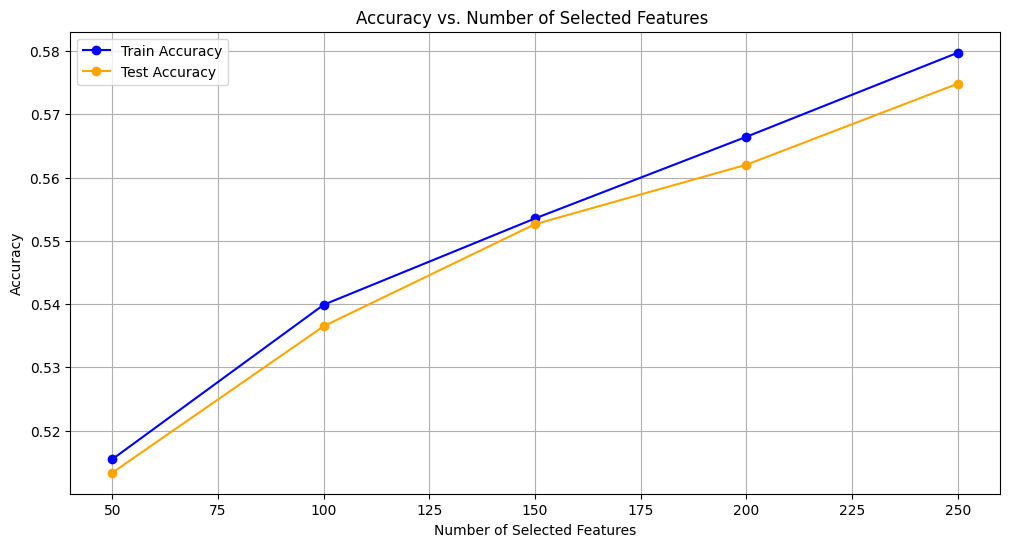

In [71]:
# @title Plot the accuracy vs. number of features
plt.figure(figsize=(12, 6))
plt.plot(feature_counts, train_accuracies, label="Train Accuracy", marker="o", color="blue")
plt.plot(feature_counts, test_accuracies, label="Test Accuracy", marker="o", color="orange")
plt.xlabel("Number of Selected Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Selected Features ")
plt.legend()
plt.grid()
plt.show()


# ***Dataset Spliting, Encoding and Staging***

In [31]:
# @title Select tran and test sets
#selector = SelectKBest(score_func=mutual_info_classif, k=300)

    # Fit and transform the training set
X_train_selected = X_train #selector.fit_transform(X_train, y_train)
X_test_selected = X_test#selector.transform(X_test)

In [32]:
# @title Split train and test sets into two stages
#X_train_full, X_test, y_train_full, y_test = train_test_split(X_combined_tfidf, df['status'], test_size=0.2, random_state=42)
X_train_full, X_test, y_train_full, y_test =X_train_selected, X_test_selected, y_train , y_test

In [33]:
# @title Encode labels
# Encode labels for binary classification (Stage 1)
binary_encoder = LabelEncoder()
y_train_full_binary = binary_encoder.fit_transform(y_train_full.apply(lambda x: 'Normal' if x == 'Normal' else 'Non-Normal'))
y_test_binary = binary_encoder.transform(y_test.apply(lambda x: 'Normal' if x == 'Normal' else 'Non-Normal'))

# Encode labels for multi-class classification (Stage 2)
multi_encoder = LabelEncoder()
y_train_full_multi = multi_encoder.fit_transform(y_train_full[y_train_full != 'Normal'])  # Only for "Non-Normal" classes
y_test_multi = multi_encoder.transform(y_test[y_test != 'Normal'])  # Only for "Non-Normal" classes


In [34]:
# @title Split train data for Stage 1 and Stage 2
X_train_tfidf_stage1 = X_train_full
X_train_tfidf_stage2 = X_train_full[y_train_full != 'Normal']
y_train_tfidf_stage1 = y_train_full_binary
y_train_tfidf_stage2 = y_train_full_multi

X_test_tfidf_stage1 = X_test
X_test_tfidf_stage2 = X_test[y_test != 'Normal']



# ***Normal Statement Classification***

### What we will do


>  Stage 1

>  1.1  Logistic regression classifier

>  2.2 neural network classifier

>  2.3 chosssing the best classifier


##  1.1 Stage 1: SVM

### Grid Search Param Definie

In [22]:
# Define the binary classifier
clf = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 0.8,1,2, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Optimization algorithms
    'penalty': ['l2'],  # Regularization type
}


###  Grid Search Fit

In [23]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf_stage1, y_train_tfidf_stage1)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 0.8, 1, 2, 10, 100],
                         'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

### best PArarms

In [32]:

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_accuracy}")


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy: 0.8306757108977454


In [33]:
logistic1_classifier= SVC(random_state=42,C=0.7)
logistic1_classifier.fit(X_train_tfidf_stage1, y_train_tfidf_stage1)

SVC(C=0.7, random_state=42)

In [ ]:
#logistic1_classifier= grid_search.best_estimator_

### classification report for train

In [34]:
# Evaluate binary classifier
y_pred_stage1 = logistic1_classifier.predict(X_train_tfidf_stage1)
print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_train_tfidf_stage1, y_pred_stage1))
print(classification_report(y_train_tfidf_stage1, y_pred_stage1))
print("Confusion Matrix:\n", confusion_matrix(y_train_tfidf_stage1, y_pred_stage1))


Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.8342350037965072
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     29109
           1       0.78      0.65      0.71     13035

    accuracy                           0.83     42144
   macro avg       0.82      0.78      0.80     42144
weighted avg       0.83      0.83      0.83     42144

Confusion Matrix:
 [[26671  2438]
 [ 4548  8487]]


### classification report

In [37]:
# Evaluate binary classifier
y_pred_stage1 = logistic1_classifier.predict(X_test_tfidf_stage1)
print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_stage1))
print(classification_report(y_test_binary, y_pred_stage1))
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_stage1))


Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.8420802885071652
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7229
           1       0.79      0.67      0.73      3308

    accuracy                           0.84     10537
   macro avg       0.83      0.80      0.81     10537
weighted avg       0.84      0.84      0.84     10537

Confusion Matrix:
 [[6649  580]
 [1084 2224]]


### Heat Map

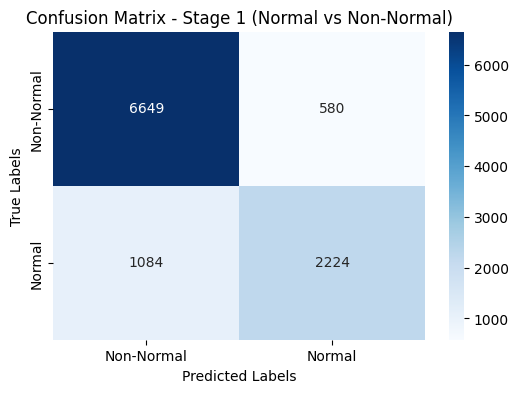

In [38]:
# Calculate confusion matrix for Stage 1
conf_matrix_stage1 = confusion_matrix(y_test_binary, y_pred_stage1)

# Plot heatmap for Stage 1
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_stage1, annot=True, fmt="d", cmap="Blues", xticklabels=binary_encoder.classes_, yticklabels=binary_encoder.classes_)
plt.title("Confusion Matrix - Stage 1 (Normal vs Non-Normal)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## 1.2  Stage 1:  Neural Network

In [35]:
# @title Define the layers in an array
layers = [
    Dense(units=128, activation='relu', input_shape=(X_train_tfidf_stage1.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=32, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.1),  # Dropout Layer 1
    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 2

    Dense(units=2, activation='softmax')  # Output Layer
]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [36]:
# @title Model Fit
# Train the model on training data with validation on the test data
history = model.fit(X_train_tfidf_stage1,
                    y_train_tfidf_stage1,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.3,
                    verbose=1
                    )


Epoch 1/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9026 - loss: 1.6615 - val_accuracy: 0.9206 - val_loss: 0.3284
Epoch 2/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9259 - loss: 0.2964 - val_accuracy: 0.9158 - val_loss: 0.2839
Epoch 3/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9219 - loss: 0.2592 - val_accuracy: 0.8985 - val_loss: 0.3015
Epoch 4/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9206 - loss: 0.2530 - val_accuracy: 0.9195 - val_loss: 0.2610
Epoch 5/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9223 - loss: 0.2507 - val_accuracy: 0.8934 - val_loss: 0.3155
Epoch 6/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.2430 - val_accuracy: 0.9253 - val_loss: 0.2332
Epoch 7/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9192 - loss: 0.2442 - val_accuracy: 0.9234 - val_loss: 0.2341
Epoch 8/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9238 - loss: 0.2342 - val_accuracy: 

In [37]:
# @title Classification report on train
# Evaluate binary classifier
y_pred_stage1 = model.predict(X_train_tfidf_stage1)
y_pred_stage1 = y_pred_stage1.argmax(axis=1)  # Convert probabilities to class predictions

print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_train_tfidf_stage1, y_pred_stage1))
print(classification_report(y_train_tfidf_stage1, y_pred_stage1))
print("Confusion Matrix:\n", confusion_matrix(y_train_tfidf_stage1, y_pred_stage1))


1317/1317 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.9332763857251328
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29109
           1       0.91      0.87      0.89     13035

    accuracy                           0.93     42144
   macro avg       0.93      0.91      0.92     42144
weighted avg       0.93      0.93      0.93     42144

Confusion Matrix:
 [[28049  1060]
 [ 1752 11283]]


In [38]:
# @title  Confusion Matrix
# Make predictions on the test set
y_pred_prob = model.predict(X_test_tfidf_stage1)
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_nn = accuracy_score(y_test_binary,y_pred)
print("\n")
print("Accuracy:", accuracy_nn)

# Compute the confusion matrix

conf_matrix_nn = confusion_matrix(y_test_binary,y_pred)

# Print classification report
print("Confusion Matrix:\n",)
print( conf_matrix_nn)


330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Accuracy: 0.928252823384265
Confusion Matrix:

[[6953  276]
 [ 480 2828]]


In [39]:
# @title classification report
print(classification_report(y_test_binary, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7229
           1       0.91      0.85      0.88      3308

    accuracy                           0.93     10537
   macro avg       0.92      0.91      0.92     10537
weighted avg       0.93      0.93      0.93     10537



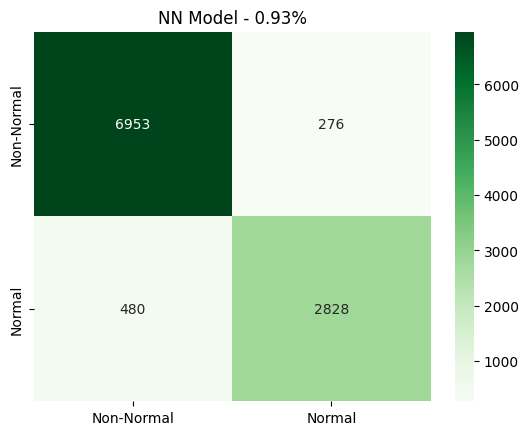

In [40]:
# @title Heat Map
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=binary_encoder.classes_, yticklabels=binary_encoder.classes_)
ax.set_title(f'NN Model - {accuracy_nn:.2}%')
plt.show()

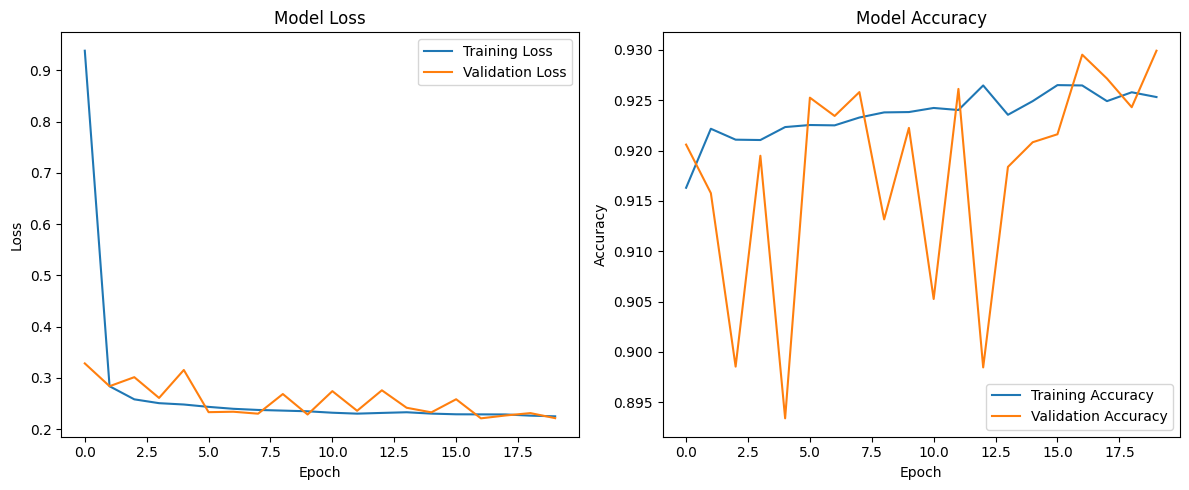

In [41]:
# @title Learnong curve
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## 1.3 Best Classifier for  Stage 1

we chose the best classfier for this stage

In [42]:
# binary_classifier = logistic1_classifier
binary_classifier = model

# ***Non Normal Statement Classification***

## 2.1 SVM Stage 2

### Grid Search Params

In [111]:
# Define the binary classifier
clf = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [ 0.03,0.01, 0.02],  # Regularization strength
    'solver': ['lbfgs'],  # Optimization algorithms
    'penalty': ['l2'],  # Regularization type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)



### Train the Model

In [112]:
# Fit the grid search on the training data
grid_search.fit(X_train_tfidf_stage2, y_train_tfidf_stage2)



Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.03, 0.01, 0.02], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

### Best Classifier

In [113]:
# Get the best model and hyperparameters
best_clf = grid_search.best_estimator_
print("Best hyperparameters found: ", grid_search.best_params_)


Best hyperparameters found:  {'C': 0.03, 'penalty': 'l2', 'solver': 'lbfgs'}


In [114]:
# Train multi-class classifier for Stage 2
logistic_classifier =best_clf
logistic_classifier = SVC(random_state=42,kernel='linear',C=0.3)

logistic_classifier.fit(X_train_tfidf_stage2, y_train_tfidf_stage2)


SVC(C=0.3, kernel='linear', random_state=42)

### Classification report on training

In [115]:
# Evaluate binary classifier
y_pred_stage2 = logistic_classifier.predict(X_train_tfidf_stage2)
print("Stage 1 (Binary Classification) - Normal vs Non-Normal")
print("Accuracy:", accuracy_score(y_train_tfidf_stage2, y_pred_stage2))
print(classification_report(y_train_tfidf_stage2, y_pred_stage2))
print("Confusion Matrix:\n", confusion_matrix(y_train_tfidf_stage2, y_pred_stage2))


Stage 1 (Binary Classification) - Normal vs Non-Normal
Accuracy: 0.45937682503693017
              precision    recall  f1-score   support

           0       0.84      0.05      0.09      3086
           1       0.00      0.00      0.00      2250
           2       0.44      0.97      0.61     12388
           3       0.00      0.00      0.00       840
           4       0.00      0.00      0.00      2051
           5       0.74      0.14      0.24      8494

    accuracy                           0.46     29109
   macro avg       0.34      0.19      0.16     29109
weighted avg       0.49      0.46      0.34     29109

Confusion Matrix:
 [[  154     0  2905     0     0    27]
 [    0     0  2245     0     0     5]
 [    8     0 12000     0     0   380]
 [    2     0   832     0     0     6]
 [    9     0  2035     0     0     7]
 [   11     1  7264     0     0  1218]]


### Classification Report

In [116]:

# Evaluate multi-class classifier
y_pred_stage2 = logistic_classifier.predict(X_test_tfidf_stage2)
print("Stage 2 (Multi-Class Classification) - Specific Conditions")
print("Accuracy:", accuracy_score(y_test_multi, y_pred_stage2))
print(classification_report(y_test_multi, y_pred_stage2))
conf_matrix_stage2= confusion_matrix(y_test_multi, y_pred_stage2)
print("Confusion Matrix:\n",conf_matrix_stage2)


Stage 2 (Multi-Class Classification) - Specific Conditions
Accuracy: 0.449578088255637
              precision    recall  f1-score   support

           0       0.92      0.05      0.09       755
           1       0.00      0.00      0.00       527
           2       0.43      0.96      0.59      3016
           3       0.00      0.00      0.00       237
           4       0.00      0.00      0.00       536
           5       0.72      0.15      0.24      2158

    accuracy                           0.45      7229
   macro avg       0.35      0.19      0.15      7229
weighted avg       0.49      0.45      0.33      7229

Confusion Matrix:
 [[  35    0  714    0    0    6]
 [   0    0  525    0    0    2]
 [   2    0 2902    0    0  112]
 [   0    0  237    0    0    0]
 [   1    0  535    0    0    0]
 [   0    0 1845    0    0  313]]


### Heat Map

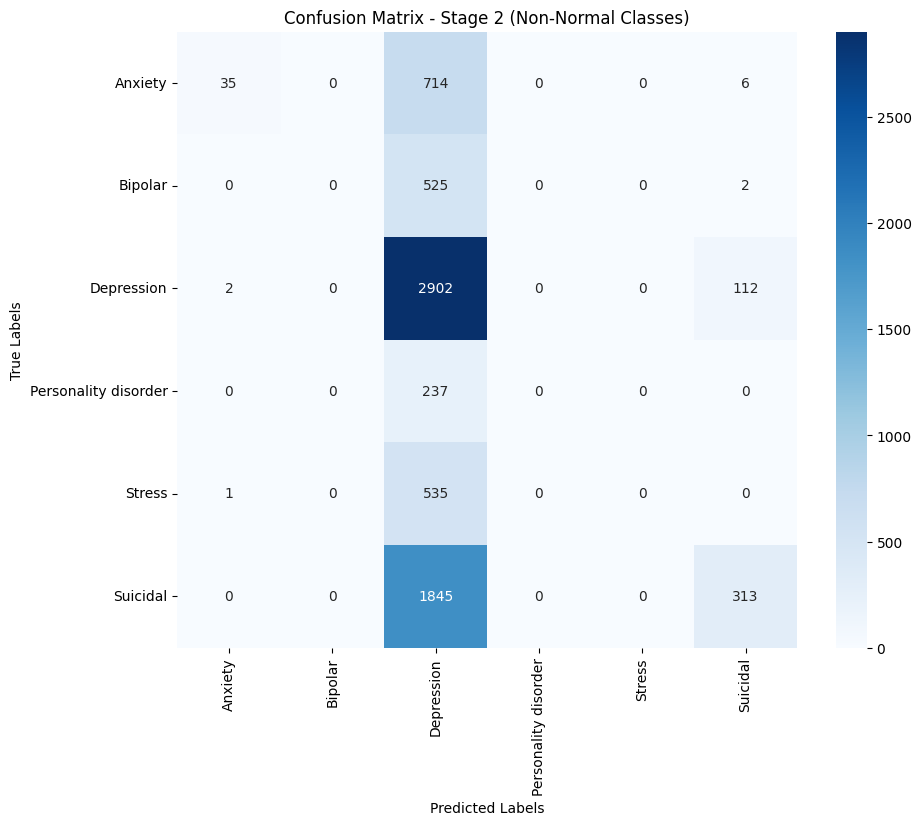

In [117]:
# Plot heatmap for Stage 2
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_stage2, annot=True, fmt="d", cmap="Blues", xticklabels=multi_encoder.classes_, yticklabels=multi_encoder.classes_)
plt.title("Confusion Matrix - Stage 2 (Non-Normal Classes)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## 2.2 Neural Network  Stage 2

In [43]:
# @title Import
from tensorflow.keras.layers import Conv1D,LSTM, MaxPooling1D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [44]:
# @title Define Layers
# Define the layers in an array
layers = [

    Dense(units=128, activation='relu', input_shape=(X_train_tfidf_stage2.shape[1],),kernel_regularizer=l2(0.01)),  # Input Layer
    BatchNormalization(),
    Dropout(rate=0.3),  # Dropout Layer 1
    Dense(units=64, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    BatchNormalization(),

    Dense(units=32, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    BatchNormalization(),

    Dense(units=16, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    Dropout(rate=0.2),  # Dropout Layer 1
    Dense(units=8, activation='relu',kernel_regularizer=l2(0.01)),  # Hidden Layer 1
    BatchNormalization(),

    Dense(units=6, activation='softmax')  # Output Layer
]


# Define the updated layers
# layers = [
#     # Convolutional Layer
#     Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_tfidf_stage2.shape[1], 1)),
#     MaxPooling1D(pool_size=2),  # Pooling Layer to reduce dimensionality
#     BatchNormalization(),
#     Conv1D(filters=8, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),  # Pooling Layer to reduce dimensionality
#     BatchNormalization(),
#     Flatten(),  # Flatten the Conv1D output for the Dense layers

#     # Dense Layers
#     Dense(units=120, activation='relu', kernel_regularizer=l2(0.01)),
# #    BatchNormalization(),
#     Dropout(rate=0.3),  # Dropout Layer 1
#     Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
#     Dropout(rate=0.2),  # Dropout Layer 2
#     Dense(units=16, activation='relu', kernel_regularizer=l2(0.01)),
#     Dense(units=6, activation='softmax')  # Output Layer
# ]

# Initialize the Sequential model
model = Sequential(layers)


# Compile the model: Using Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [45]:

# @title Model Fit
# Train the model on training data with validation on the test data
history = model.fit(X_train_tfidf_stage2,
                    y_train_tfidf_stage2,
                    epochs=27,
                    batch_size=64,
                    validation_split=0.3,
                    verbose=1
                    )
nn_classifier = model

Epoch 1/27
319/319 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.4195 - loss: 3.1767 - val_accuracy: 0.4314 - val_loss: 1.5392
Epoch 2/27
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5090 - loss: 1.4204 - val_accuracy: 0.4496 - val_loss: 1.4450
Epoch 3/27
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4997 - loss: 1.3856 - val_accuracy: 0.2697 - val_loss: 1.8983
Epoch 4/27
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4950 - loss: 1.3673 - val_accuracy: 0.4971 - val_loss: 1.3901
Epoch 5/27
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4969 - loss: 1.3692 - val_accuracy: 0.4738 - val_loss: 1.4212
Epoch 6/27
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4946 - loss: 1.3564 - val_accuracy: 0.3156 - val_loss: 2.3783
Epoch 7/27
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4973 - loss: 1.3568 - val_accuracy: 0.4980 - val_loss: 1.4293
Epoch 8/27
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5069 - loss: 1.3258 - val_accuracy: 

In [46]:
# @title Classification Report
# Make predictions on the test set
y_pred_prob = model.predict(X_test_tfidf_stage2)
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Calculate the accuracy
accuracy_score_final = accuracy_score(y_test_multi,y_pred)
print("\n")
print("Accuracy:", accuracy_score_final)

# Compute the confusion matrix
classification_report_final =classification_report(y_test_multi, y_pred)
print(f"Overall Accuracy: {accuracy_score_final:.2f}")

print(classification_report_final)
conf_matrix_nn = confusion_matrix(y_test_multi,y_pred)

# Print classification report
print("Confusion Matrix:\n",conf_matrix_nn)


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Accuracy: 0.5329921150919906
Overall Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.56      0.61      0.58       755
           1       0.40      0.26      0.32       527
           2       0.51      0.84      0.63      3016
           3       0.00      0.00      0.00       237
           4       0.00      0.00      0.00       536
           5       0.65      0.34      0.45      2158

    accuracy                           0.53      7229
   macro avg       0.35      0.34      0.33      7229
weighted avg       0.50      0.53      0.48      7229

Confusion Matrix:
 [[ 460   68  203    0    0   24]
 [  76  139  308    0    0    4]
 [ 111   42 2519    0    0  344]
 [  12   25  195    0    0    5]
 [  90   69  360    0    0   17]
 [  73    2 1348    0    0  735]]


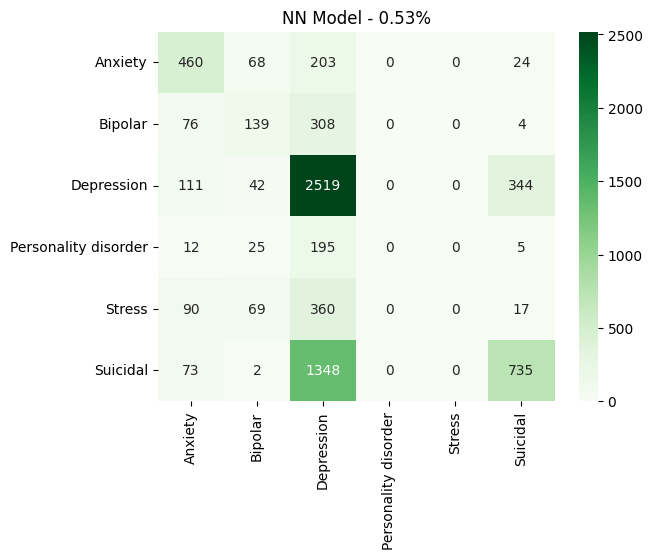

In [47]:
# @title Heat Map
ax = sns.heatmap(conf_matrix_nn, annot = True, fmt='d', cmap='Greens', xticklabels=multi_encoder.classes_, yticklabels=multi_encoder.classes_)
ax.set_title(f'NN Model - {accuracy_score_final:.2}%')
plt.show()

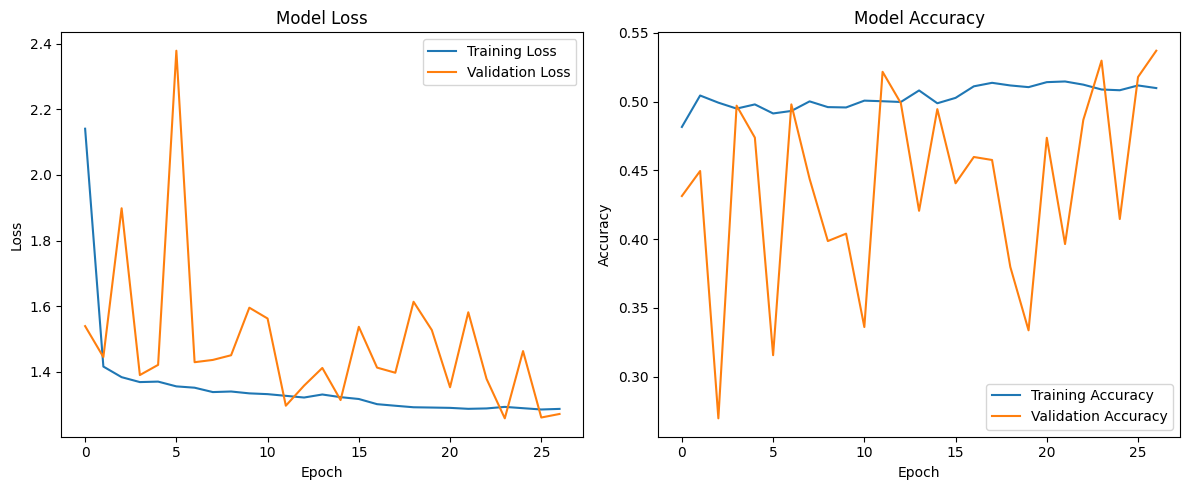

In [48]:
# @title Learning Curve
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # Adjusts subplots to fit in the figure area.
plt.show()  # Display the plots

## 2.3 Best Model

choosing the best classfier for this stage

In [49]:
# multi_classifier = logistic_classifier
multi_classifier = nn_classifier

# ***combined Two Classifiers***

## ***3.1 Predict the test set***

### Initialize list for final predictions and true labels


In [50]:
# Initialize list for final predictions and true labels
final_predictions = []
ground_truth = y_test  # Convert y_test to list for easy comparison


### Iterate Over the Test Samples

In [51]:
import numpy as np
import contextlib
import io

# Suppress logs globally for prediction
with contextlib.redirect_stdout(io.StringIO()):

    # Precompute binary labels for "Normal" and "Non-Normal"
    normal_label = binary_encoder.transform(['Normal'])[0]

    # Predict Stage 1 in a single batch
    stage1_predictions = binary_classifier.predict(X_test).argmax(axis=1)

    # Prepare the final predictions
    final_predictions = []

    # Batch processing for Stage 2
    non_normal_indices = np.where(stage1_predictions != normal_label)[0]  # Indices of "Non-Normal" predictions
    normal_indices = np.where(stage1_predictions == normal_label)[0]  # Indices of "Normal" predictions

    # Add "Normal" predictions directly
    final_predictions.extend(['Normal'] * len(normal_indices))

    # Process "Non-Normal" predictions
    if len(non_normal_indices) > 0:
        # Extract corresponding test samples for Stage 2
        X_stage2_test = X_test[non_normal_indices]

        # Predict using the multi-class model
        stage2_predictions = model.predict(X_stage2_test).argmax(axis=1)

        # Decode predictions back to labels
        decoded_stage2_predictions = multi_encoder.inverse_transform(stage2_predictions)

        # Append Stage 2 predictions
        final_predictions.extend(decoded_stage2_predictions)

    # Reorder final predictions to match the original order
    final_predictions = [final_predictions[i] for i in np.argsort(np.concatenate([normal_indices, non_normal_indices]))]


## ***3.2 Classification Report***

In [52]:
accuracy_score_final=accuracy_score(ground_truth, final_predictions)
classification_report_final =classification_report(ground_truth, final_predictions)
# Final Combined Evaluation
print("\nCombined Two-Level Classification Results")
print(f"Overall Accuracy: {accuracy_score_final:.2f}")
print(classification_report_final)



Combined Two-Level Classification Results
Overall Accuracy: 0.62
                      precision    recall  f1-score   support

             Anxiety       0.51      0.56      0.54       755
             Bipolar       0.39      0.26      0.31       527
          Depression       0.48      0.81      0.60      3016
              Normal       0.91      0.85      0.88      3308
Personality disorder       0.00      0.00      0.00       237
              Stress       0.00      0.00      0.00       536
            Suicidal       0.62      0.32      0.42      2158

            accuracy                           0.62     10537
           macro avg       0.42      0.40      0.39     10537
        weighted avg       0.61      0.62      0.59     10537



## ***3.3 Overall Heat Map***

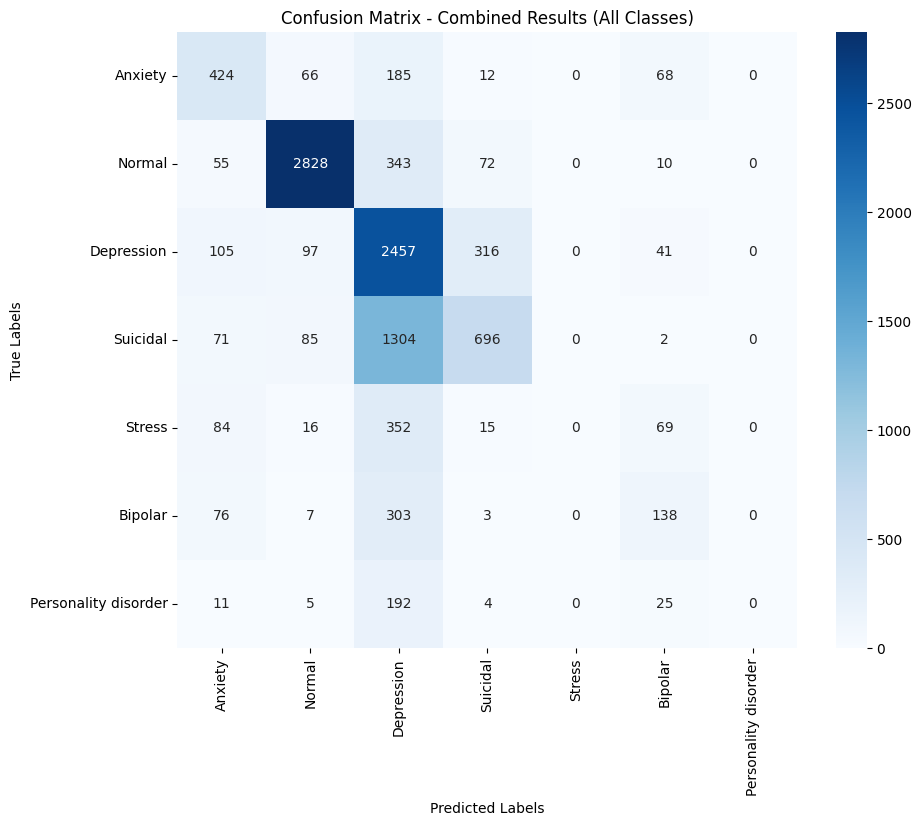

In [53]:
# Confusion Matrix and Heatmap for Combined Results
conf_matrix_combined = confusion_matrix(ground_truth, final_predictions, labels=df['status'].unique())
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_combined, annot=True, fmt="d", cmap="Blues", xticklabels=df['status'].unique(), yticklabels=df['status'].unique())
plt.title("Confusion Matrix - Combined Results (All Classes)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## ***3.4 Conclusion***

# Fine Tune Bert


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel


In [ ]:
# Load BERT Tokenizer and Model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenization and Input Preparation
def tokenize_sentences(sentences, tokenizer, max_length=128):
    return tokenizer(
        list(sentences),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Tokenize Train and Test Data
train_tokens = tokenize_sentences(df['statement'][y_train.index], bert_tokenizer) # Use the original 'statement' column and filter by train indices
test_tokens = tokenize_sentences(df['statement'][y_test.index], bert_tokenizer) # Use the original 'statement' column and filter by test indices

# Extract Input IDs and Attention Masks
X_train_input_ids = train_tokens['input_ids']
X_train_attention_mask = train_tokens['attention_mask']

X_test_input_ids = test_tokens['input_ids']
X_test_attention_mask = test_tokens['attention_mask']

In [ ]:
# Train the Model
# Encode labels for binary classification (Stage 1)
binary_encoder = LabelEncoder()
y_train_encoded = binary_encoder.fit_transform(y_train) # Encode y_train to numerical values
y_test_encoded = binary_encoder.transform(y_test) # Encode y_test using the same encoder


In [ ]:
# Define Neural Network Architecture
class BERTClassifier(tf.keras.Model):
    def __init__(self, bert_model, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = Dropout(0.3)
        self.dense = Dense(num_classes, activation='softmax')

    def call(self, inputs):
        input_ids, attention_mask = inputs
        bert_output = self.bert(input_ids, attention_mask=attention_mask)[1]  # Get [CLS] token output
        x = self.dropout(bert_output)
        return self.dense(x)

# Initialize the Model
num_classes = len(np.unique(y_train_encoded))  # Get the number of unique classes in y_train_encoded
model = BERTClassifier(bert_model, num_classes)

# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:


history = model.fit(
    [X_train_input_ids, X_train_attention_mask],
    y_train_encoded, # Use encoded y_train
    validation_data=([X_test_input_ids, X_test_attention_mask], y_test_encoded), # Use encoded y_test
    epochs=5,
    batch_size=512
)

Epoch 1/5
 1/83 ━━━━━━━━━━━━━━━━━━━━ 7:44:44 340s/step - accuracy: 0.1523 - loss: 1.8520

In [ ]:
# Evaluate the Model
loss, accuracy = model.evaluate([X_test_input_ids, X_test_attention_mask], y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")



In [ ]:

plt.figure(figsize=(10, 5))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# BERT with one stage

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from transformers import BertTokenizer, TFBertModel


In [ ]:


# Encode Labels
label_encoder = LabelEncoder()
df['status_encoded'] = label_encoder.fit_transform(df['status'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['statement'], df['status_encoded'], test_size=0.2, random_state=42
)

# Load Pre-trained BERT Tokenizer and Model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:

# Tokenization and Input Preparation
def tokenize_sentences(sentences, tokenizer, max_length=64):
    return tokenizer(
        list(sentences),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )


In [ ]:

# Tokenize Train and Test Data
train_tokens = tokenize_sentences(sentences=X_train, tokenizer=bert_tokenizer)
test_tokens = tokenize_sentences(X_test, bert_tokenizer)


In [ ]:

# Extract Input IDs and Attention Masks
X_train_input_ids = train_tokens['input_ids']
X_train_attention_mask = train_tokens['attention_mask']
X_test_input_ids = test_tokens['input_ids']
X_test_attention_mask = test_tokens['attention_mask']
import numpy as np

def get_bert_embeddings_batch(input_ids, attention_mask, bert_model, batch_size=32):
    """Extract [CLS] token embeddings in batches to avoid OOM errors."""
    num_samples = input_ids.shape[0]
    embeddings = []

    for i in range(0, num_samples, batch_size):
        batch_input_ids = input_ids[i : i + batch_size]
        batch_attention_mask = attention_mask[i : i + batch_size]
        outputs = bert_model(batch_input_ids, attention_mask=batch_attention_mask)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]
        embeddings.append(cls_embeddings.numpy())  # Convert to NumPy immediately

    return np.concatenate(embeddings, axis=0)  # Concatenate all batches



In [ ]:

# Generate Embeddings for Train and Test Data
# Generate Embeddings for Train and Test Data in Batches
X_train_embeddings = get_bert_embeddings_batch(X_train_input_ids, X_train_attention_mask, bert_model)
X_test_embeddings = get_bert_embeddings_batch(X_test_input_ids, X_test_attention_mask, bert_model)

# X_train_embeddings = get_bert_embeddings(X_train_input_ids, X_train_attention_mask, bert_model)
# X_test_embeddings = get_bert_embeddings(X_test_input_ids, X_test_attention_mask, bert_model)

# Convert embeddings to NumPy arrays
# X_train_embeddings = X_train_embeddings.numpy()
# X_test_embeddings = X_test_embeddings.numpy()


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [ ]:

# Define and Train Neural Network
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_embeddings.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation="softmax")  # Multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train_embeddings, y_train, validation_data=(X_test_embeddings, y_test), epochs=10, batch_size=32)



Epoch 1/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.5468 - loss: 1.2275 - val_accuracy: 0.6644 - val_loss: 0.8804
Epoch 2/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6423 - loss: 0.9375 - val_accuracy: 0.6818 - val_loss: 0.8370
Epoch 3/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6655 - loss: 0.8861 - val_accuracy: 0.6931 - val_loss: 0.7732
Epoch 4/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6764 - loss: 0.8516 - val_accuracy: 0.6988 - val_loss: 0.7661
Epoch 5/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6829 - loss: 0.8311 - val_accuracy: 0.6897 - val_loss: 0.7830
Epoch 6/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6882 - loss: 0.8217 - val_accuracy: 0.7139 - val_loss: 0.7319
Epoch 7/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6904 - loss: 0.8101 - val_accuracy: 0.6960 - val_loss: 0.7577
Epoch 8/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6922 - loss: 0.8079 -

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_embeddings, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")



330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7078 - loss: 0.7341
Test Loss: 0.7357614040374756
Test Accuracy: 0.7048496007919312


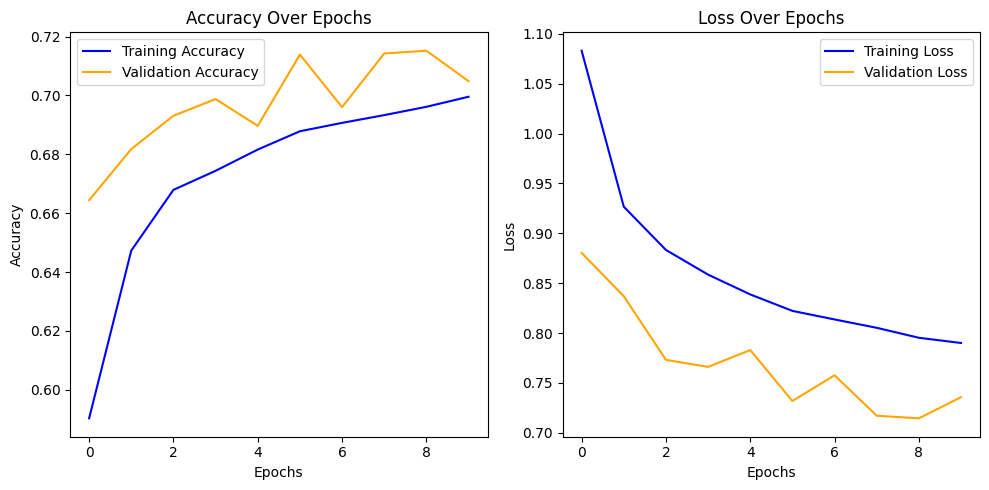

In [ ]:
# Plot Learning Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(alpha=0.5, lambda_=1.0,learning_rate=0.05, n_estimators=500)
model = xgb.fit(X_train_embeddings, y_train,eval_set=[(X_test_embeddings, y_test)])
y_pred = model.predict(X_test_embeddings)

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       755
           1       0.70      0.55      0.61       527
           2       0.60      0.74      0.66      3016
           3       0.87      0.93      0.90      3308
           4       0.91      0.33      0.48       237
           5       0.68      0.37      0.48       536
           6       0.64      0.55      0.59      2158

    accuracy                           0.71     10537
   macro avg       0.73      0.58      0.63     10537
weighted avg       0.72      0.71      0.71     10537



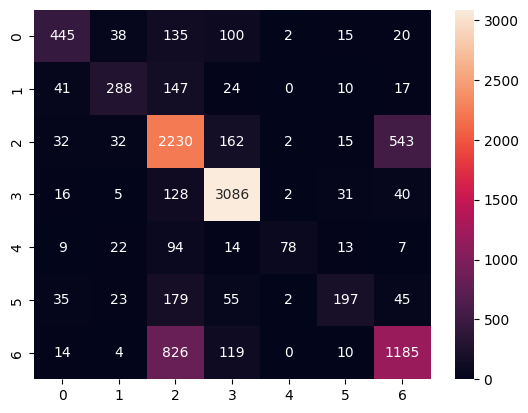

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot =True, fmt='d')
print(classification_report(y_test,y_pred))